### Dependencies 

In [ ]:
!pip install tensorflow
!pip install scikit.learn
!pip install pandas
!pip install numpy
!pip install seaborn

In [4]:
%matplotlib inline 
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from keras.datasets import mnist
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from tensorflow.keras import layers,losses,models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.imagenet_utils import preprocess_input as zero_mean
from keras.callbacks import EarlyStopping

In [ ]:
device_name = tf.test.gpu_device_name()
print(device_name)

### Data Preprocessing 

In [3]:
(data_train,label_train),(data_test,label_test)=mnist.load_data()
data_train_reshaped= data_train.reshape(data_train.shape[0], -1)
data_test_reshaped= data_test.reshape(data_test.shape[0], -1)

In [4]:
data_train_reshaped=data_train_reshaped/255
data_test_reshaped=data_test_reshaped/255
data_train_reshaped=scale(data_train_reshaped)
data_test_reshaped=scale(data_test_reshaped)

In [5]:
data_complete=np.concatenate((data_train_reshaped,data_test_reshaped))
data_complete=data_complete/255.0
data_complete=scale(data_complete)
label_complete=np.concatenate((label_train,label_test))
data_complete=data_complete.tolist()
label_complete=label_complete.tolist()


#### Visualising Data 



In [6]:
dictdata={'Image': [],'Label':[]}
for i in range(6):
  dictdata['Image'].append(data_train[i][:])
  dictdata['Label'].append(label_train[i])

In [7]:
displaydf=pd.DataFrame(dictdata)

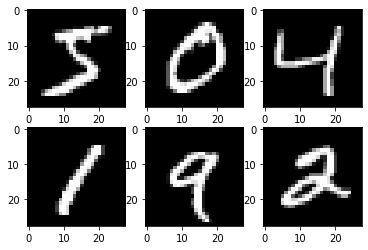

In [8]:
f, axarr = plt.subplots(2,3)
for i in range(6):
  axarr[int(i/3),i%3].imshow(displaydf['Image'][i],cmap='gray')

In [9]:
dictdatatest={'Image': [],'Label':[]}
for i in range(6):
  dictdatatest['Image'].append(data_test[i][:])
  dictdatatest['Label'].append(label_test[i])

displaydftest=pd.DataFrame(dictdatatest)

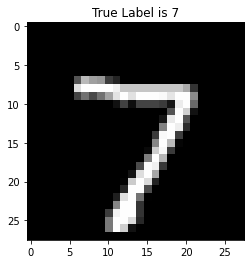

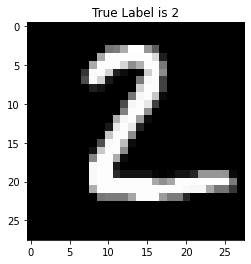

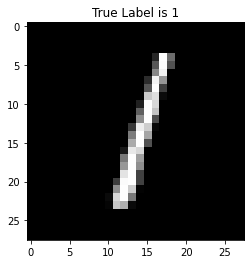

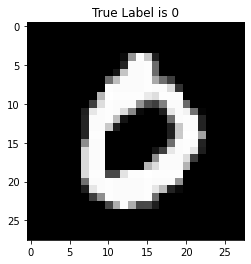

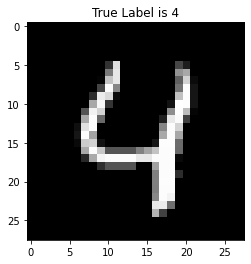

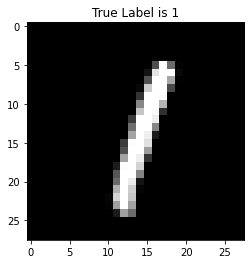

In [10]:
#Test Samples

for i in range(6):
  plt.figure()
  plt.title('True Label is %i'%displaydftest['Label'][i])
  plt.imshow(displaydftest['Image'][i],cmap='gray')

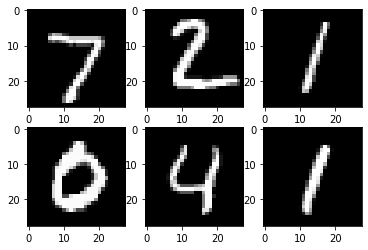

In [14]:
f, axarr = plt.subplots(2,3)
for i in range(6):
  axarr[int(i/3),i%3].imshow(displaydftest['Image'][i],cmap='gray')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


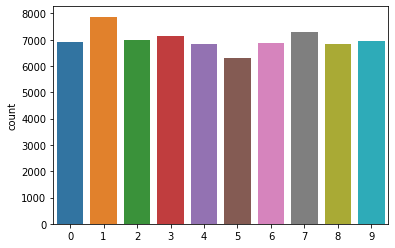

In [16]:
# Complete Dataset Histogram
sns.countplot(label_complete);

### Dimensionality Reduction

PCA

In [17]:
# pca=PCA(n_components=459)
n_components=20
pca=PCA(n_components=20)
data_PCA_train_actual=pca.fit_transform(data_train_reshaped)
data_PCA_test_actual=pca.transform(data_test_reshaped)

0.3806091732401203

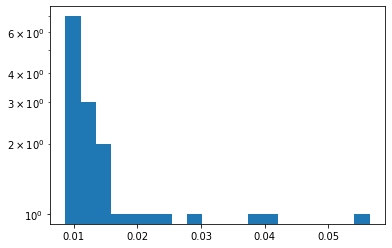

In [18]:
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

MDA

In [19]:
dim_redn_LDA=9
lda=LDA(n_components=dim_redn_LDA)
data_LDA_train_actual=lda.fit_transform(data_train_reshaped,label_train)
data_LDA_test_actual=lda.transform(data_test_reshaped)

1.0

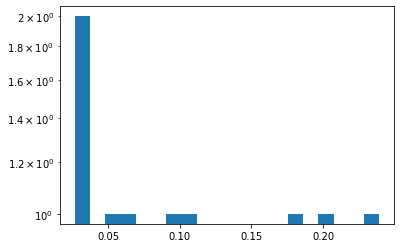

In [20]:
plt.hist(lda.explained_variance_ratio_, bins=n_components, log=True)
lda.explained_variance_ratio_.sum()

### SVM 

#### Without Dimn Redn (Time Consuming)

In [21]:
model_svm_linear=SVC(kernel='linear').fit(data_train_reshaped,label_train)
model_svm_linear.score(data_test_reshaped,label_test)

0.928

In [22]:
model_svm_linear.score(data_train_reshaped,label_train )

0.9821

#### Linear Kernel

With PCA

In [23]:
model_svm_linear=SVC(kernel='linear').fit(data_PCA_train_actual,label_train)
model_svm_linear.score(data_PCA_test_actual,label_test)

0.9001

In [24]:
#How well it is fit on the training data

model_svm_linear.score(data_PCA_train_actual,label_train)

0.9003

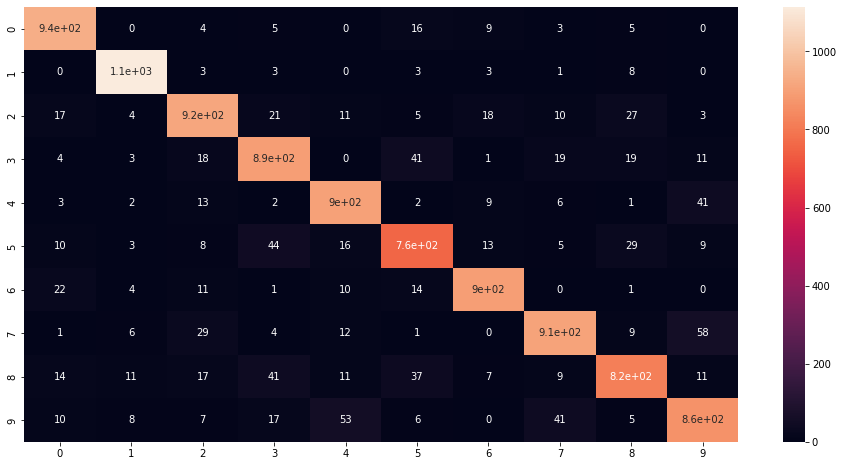

In [25]:
y_pred=model_svm_linear.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [26]:
model_svm_linear=SVC(kernel='linear').fit(data_LDA_train_actual,label_train)
model_svm_linear.score(data_LDA_test_actual,label_test)

0.893

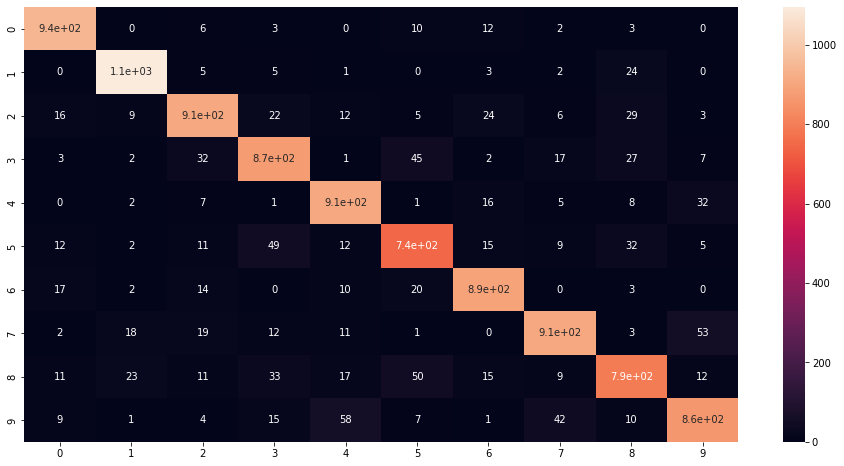

In [27]:
y_pred=model_svm_linear.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

#### RBF Kernel

With PCA

In [ ]:
#Searching for optimal parameters

# param_grid = { "C" : [0.1]
#               , "gamma" : [0.1]}
# rf = SVC()
# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
# gs = gs.fit(data_PCA_train, label_train)
# bp = gs.best_params_

In [28]:
# model_svm_linear=SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma']).fit(data_PCA_train,label_train)
model_svm_rbf=SVC( kernel='rbf' ).fit(data_PCA_train_actual,label_train)
model_svm_rbf.score(data_PCA_test_actual,label_test)

0.9618

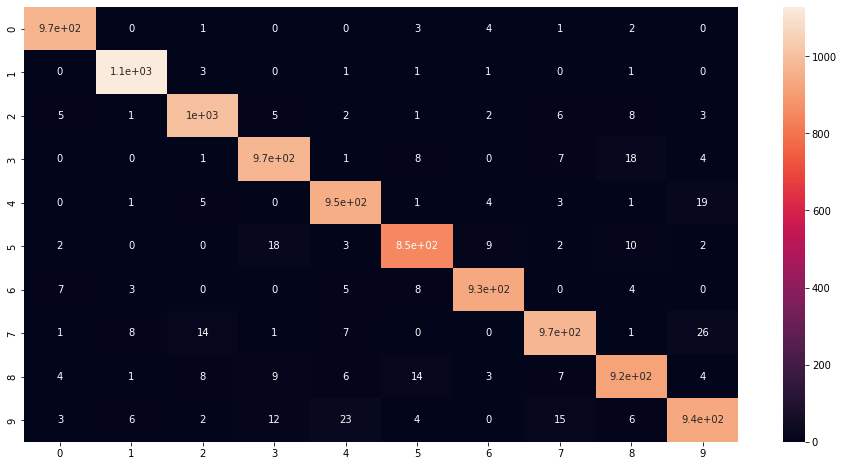

In [29]:
y_pred=model_svm_rbf.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [30]:
model_svm_rbf=SVC( kernel='rbf' ).fit(data_LDA_train_actual,label_train)
model_svm_rbf.score(data_LDA_test_actual,label_test)

0.9208

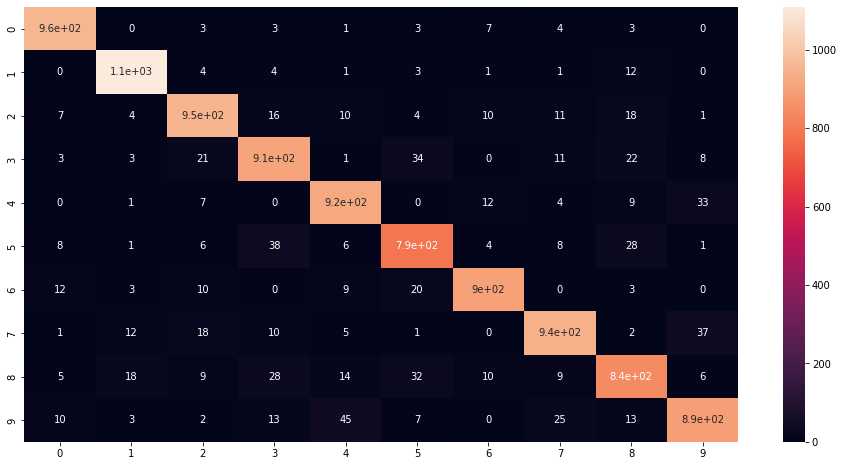

In [31]:
y_pred=model_svm_rbf.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

#### Polynomial Kernel

With PCA

In [32]:
model_svm_poly=SVC(kernel='poly').fit(data_PCA_train_actual,label_train)
model_svm_poly.score(data_PCA_test_actual,label_test)

0.9553

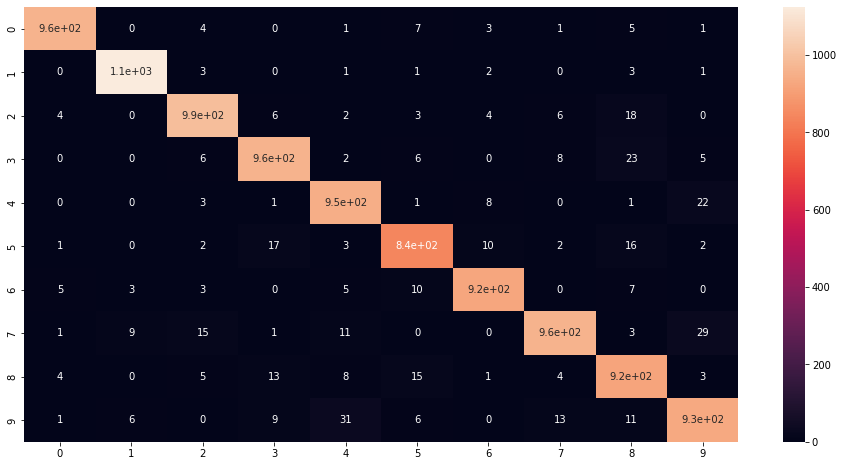

In [33]:
y_pred=model_svm_poly.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [34]:
model_svm_poly=SVC(kernel='poly').fit(data_LDA_train_actual,label_train)
model_svm_poly.score(data_LDA_test_actual,label_test)

0.9088

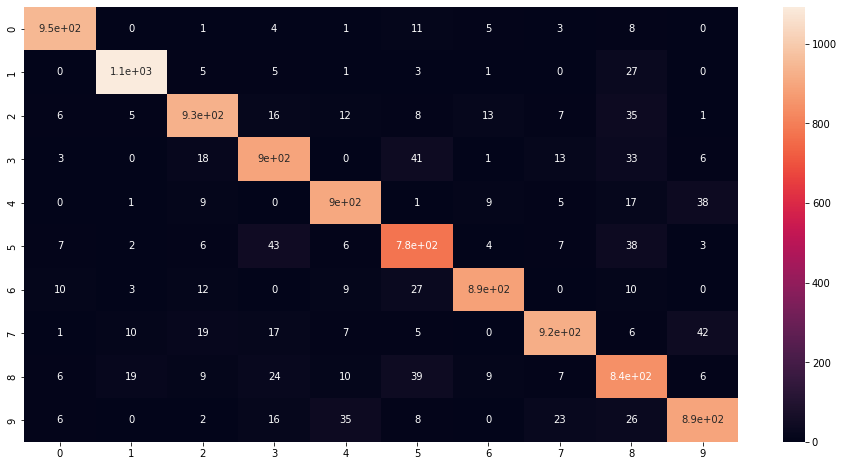

In [35]:
y_pred=model_svm_poly.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

### Logistic Regression

In [48]:
data_train_LR=scale(data_train_reshaped)
data_test_LR=scale(data_test_reshaped)

With PCA

In [49]:
clf = LogisticRegression(random_state=0,max_iter=2000).fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

0.8726

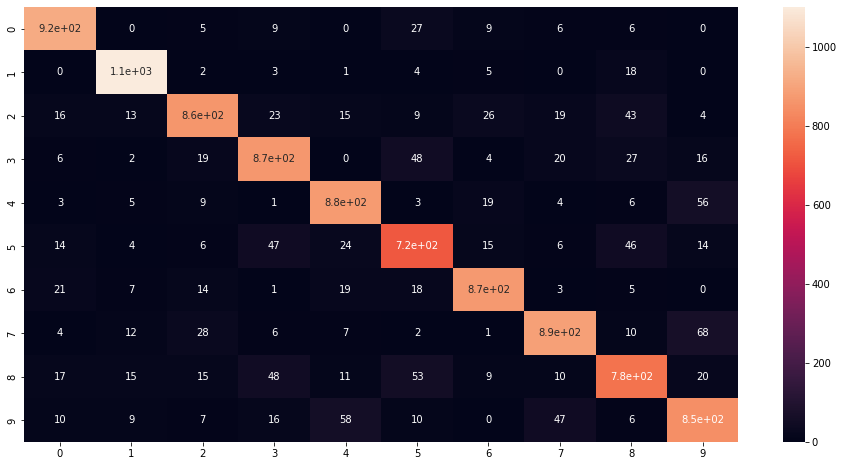

In [50]:
y_pred=clf.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With MDA

In [51]:
clf = LogisticRegression(random_state=0,max_iter=2000).fit(data_LDA_train_actual, label_train)
clf.score(data_LDA_test_actual,label_test)

0.8857

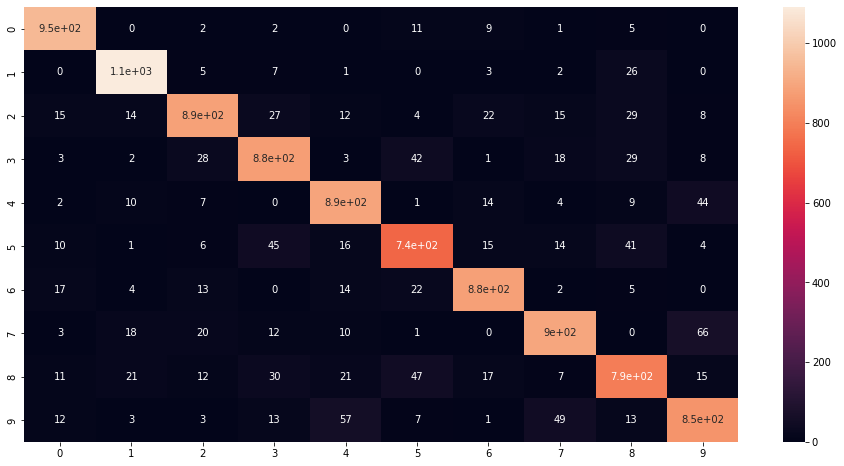

In [53]:
y_pred=clf.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With Cross Validation on PCA

In [56]:
clfnew=LogisticRegressionCV(max_iter=1000,cv=5).fit(data_PCA_train_actual,label_train)
clfnew.score(data_PCA_test_actual,label_test)

0.8726

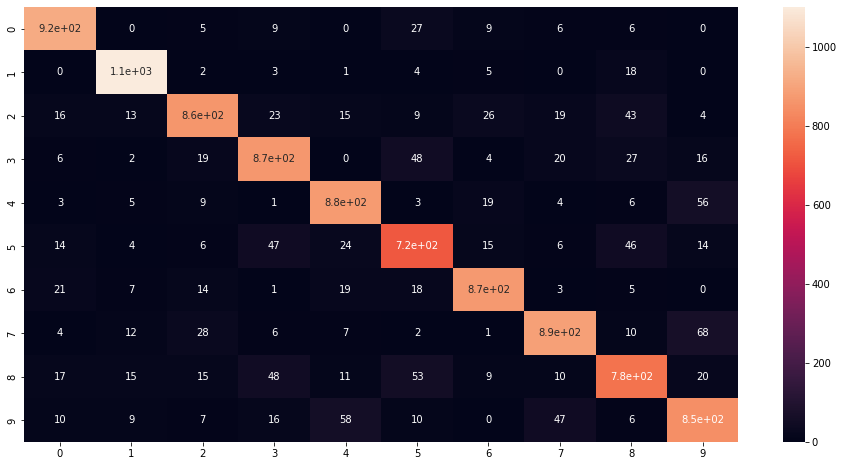

In [57]:
y_pred=clfnew.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With Cross Validation on MDA

In [60]:
clfnew=LogisticRegressionCV(max_iter=1000,cv=5).fit(data_LDA_train_actual,label_train)
clfnew.score(data_LDA_test_actual,label_test)

0.8857

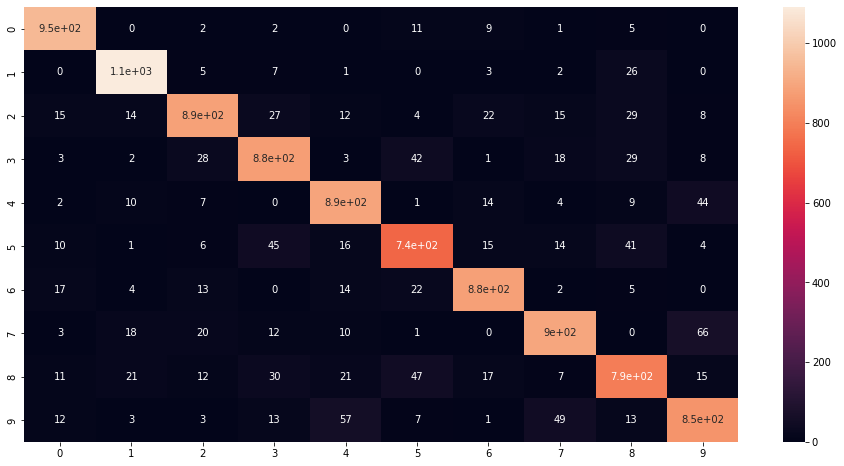

In [61]:
y_pred=clfnew.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

Balanced class weights

In [62]:
clfbal=LogisticRegression(class_weight='balanced',max_iter=2000).fit(data_PCA_train_actual,label_train)
clfbal.score(data_PCA_test_actual,label_test)

0.8724

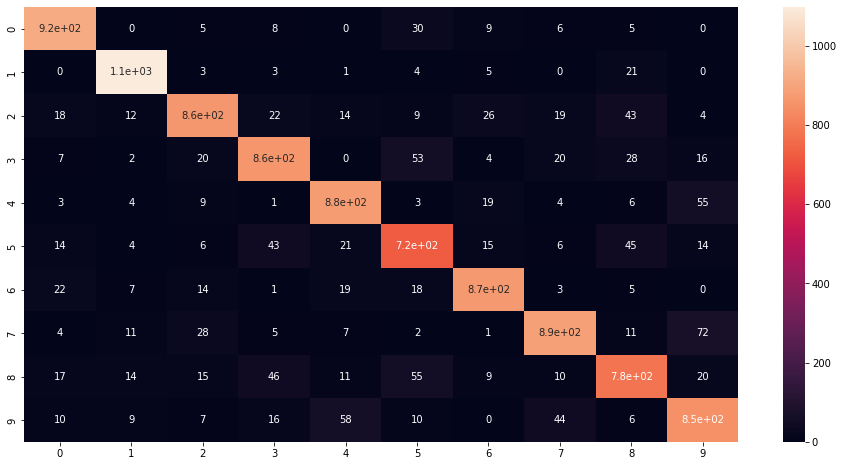

In [63]:
y_pred=clfbal.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

L1 penalty

PCA

In [64]:
clf = LogisticRegression(random_state=0,max_iter=2000,penalty='l1',solver='liblinear').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

0.8572

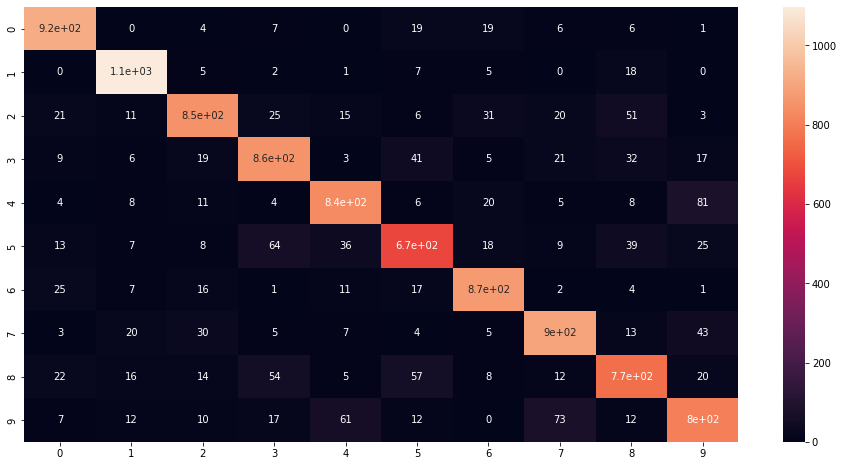

In [65]:
y_pred=clf.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

MDA

In [66]:
clf = LogisticRegression(random_state=0,max_iter=2000,penalty='l1',solver='liblinear').fit(data_LDA_train_actual, label_train)
clf.score(data_LDA_test_actual,label_test)

0.8792

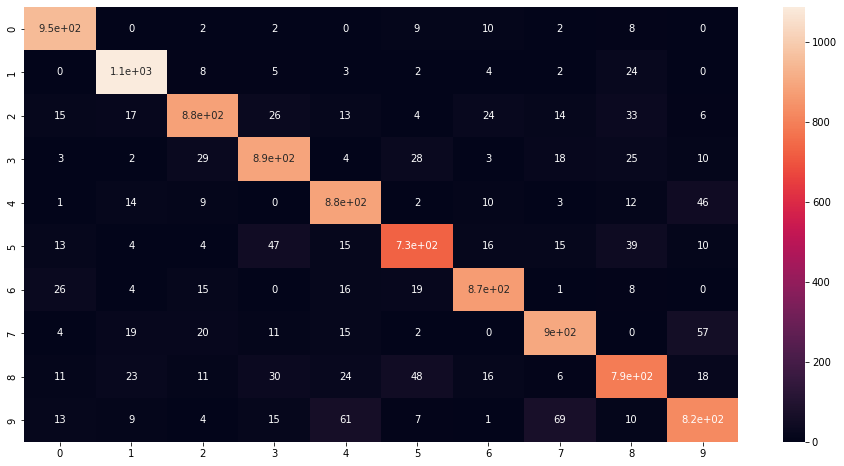

In [67]:
y_pred=clf.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

Changing Solvers

In [44]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='saga').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

0.8725

In [45]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='newton-cg').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

0.8726

In [46]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='liblinear').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

0.8572

### CNNs


In [68]:
paddings=tf.constant([[0,0],[2,2],[2,2]])
data_train_padded=tf.pad(data_train,paddings,"CONSTANT")
data_train_padded.shape
data_test_padded=tf.pad(data_test,paddings,"CONSTANT")
data_test_padded.shape

TensorShape([10000, 32, 32])

In [69]:
data_train_padded=data_train_padded/255
data_test_padded=data_test_padded/255

In [70]:
data_train_padded_array=np.array(data_train_padded)/255.0
data_test_padded_array=np.array(data_test_padded)/255.0

In [71]:
data_train_CNN= data_train_padded_array.reshape(data_train_padded_array.shape[0], -1)
data_test_CNN= data_test_padded_array.reshape(data_test_padded_array.shape[0], -1)
data_train_CNN.shape

(60000, 1024)

In [72]:
data_train_CNN_array=data_train_CNN/255.0
data_test_CNN_array=data_test_CNN/255.0

In [73]:
[x,y,z]=data_train_padded.shape

In [74]:
#Adding Channel information (Grayscale)
data_train_CNN = tf.expand_dims(data_train_padded, axis=3, name=None)
data_test_CNN = tf.expand_dims(data_test_padded, axis=3, name=None)

In [75]:
#Defining LeNet5

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [76]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 13s 14ms/step - loss: 1.7698 - accuracy: 0.3394 - val_loss: 0.4236 - val_accuracy: 0.8740
Epoch 2/40
938/938 [==============================] - 12s 13ms/step - loss: 0.3519 - accuracy: 0.8915 - val_loss: 0.2572 - val_accuracy: 0.9197
Epoch 3/40
938/938 [==============================] - 12s 13ms/step - loss: 0.2527 - accuracy: 0.9202 - val_loss: 0.2039 - val_accuracy: 0.9348
Epoch 4/40
938/938 [==============================] - 12s 13ms/step - loss: 0.2103 - accuracy: 0.9334 - val_loss: 0.1682 - val_accuracy: 0.9483
Epoch 5/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1846 - accuracy: 0.9412 - val_loss: 0.1694 - val_accuracy: 0.9460
Epoch 6/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1640 - accuracy: 0.9479 - val_loss: 0.1432 - val_accuracy: 0.9557
Epoch 7/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1457 - accuracy: 0.9544 - val_loss: 0.1257 - val_accuracy:

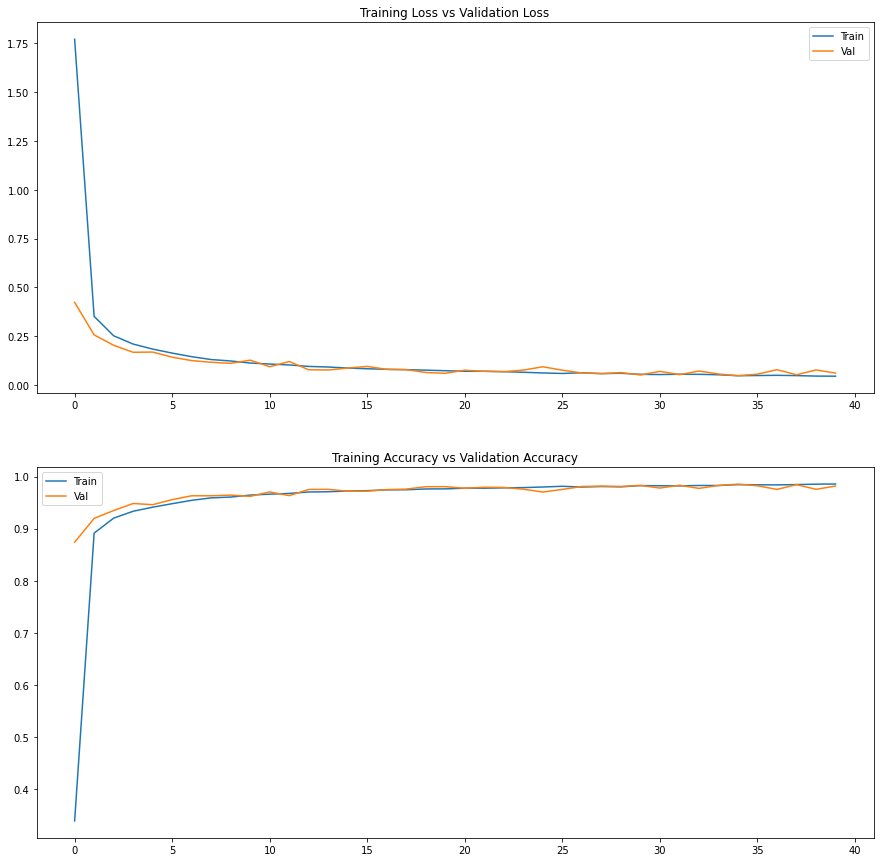

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [78]:
model.evaluate(data_test_CNN, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9818


[0.06182362139225006, 0.9818000197410583]

Same Architecture changing activation functions

In [79]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 5, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [80]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 11s 12ms/step - loss: 0.3048 - accuracy: 0.9058 - val_loss: 0.1120 - val_accuracy: 0.9646
Epoch 2/40
938/938 [==============================] - 12s 12ms/step - loss: 0.0957 - accuracy: 0.9706 - val_loss: 0.0711 - val_accuracy: 0.9755
Epoch 3/40
938/938 [==============================] - 11s 12ms/step - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0554 - val_accuracy: 0.9819
Epoch 4/40
938/938 [==============================] - 11s 11ms/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0476 - val_accuracy: 0.9841
Epoch 5/40
938/938 [==============================] - 11s 12ms/step - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 6/40
938/938 [==============================] - 11s 12ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 7/40
938/938 [==============================] - 11s 12ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0348 - val_accuracy:

In [81]:
model.evaluate(data_test_CNN, label_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9914


[0.051709532737731934, 0.9914000034332275]

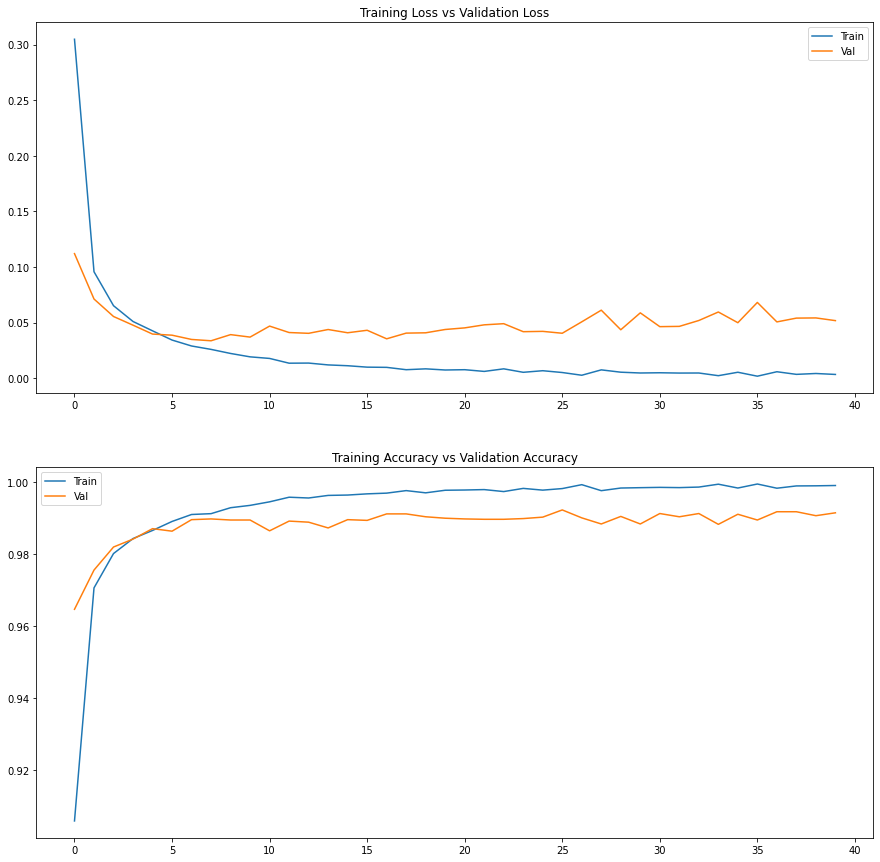

In [82]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

Changing Kernel Size

In [83]:
model = models.Sequential()
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 6)         60        
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 6)         330       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 16)        880       
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2320      
                                                      

In [84]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 24s 25ms/step - loss: 0.2340 - accuracy: 0.9285 - val_loss: 0.0619 - val_accuracy: 0.9831
Epoch 2/40
938/938 [==============================] - 24s 25ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0424 - val_accuracy: 0.9871
Epoch 3/40
938/938 [==============================] - 23s 25ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0408 - val_accuracy: 0.9875
Epoch 4/40
938/938 [==============================] - 23s 25ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 5/40
938/938 [==============================] - 24s 25ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0319 - val_accuracy: 0.9897
Epoch 6/40
938/938 [==============================] - 24s 25ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 7/40
938/938 [==============================] - 24s 25ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0313 - val_accuracy:

In [85]:
model.evaluate(data_test_CNN, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0470 - accuracy: 0.9924


[0.04704388603568077, 0.9923999905586243]

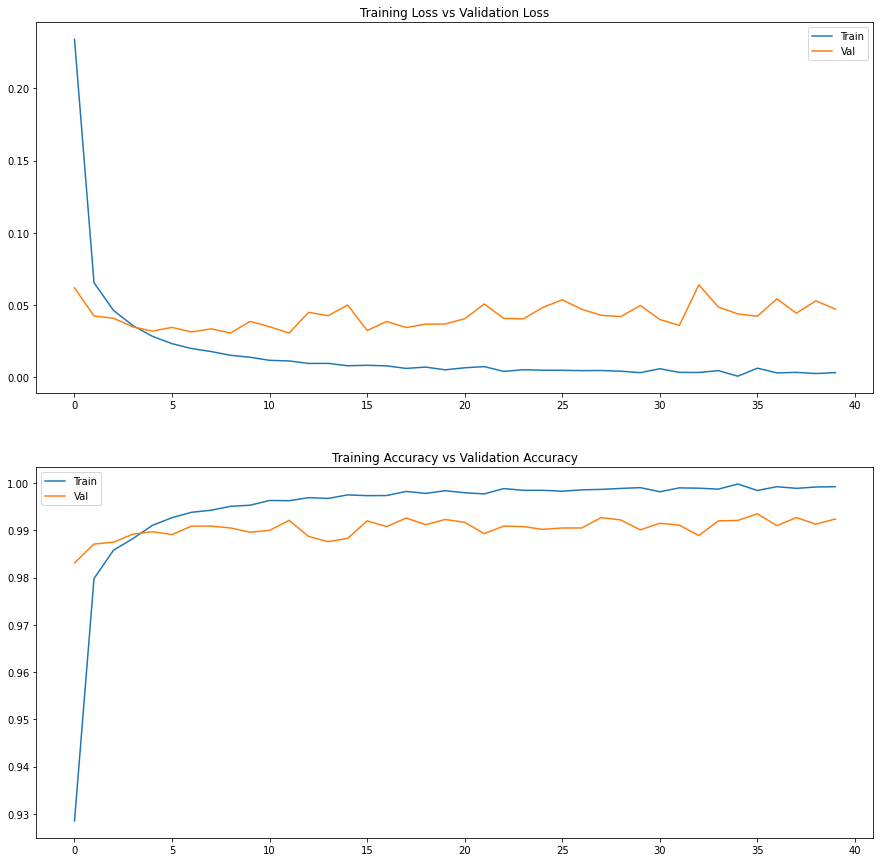

In [86]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

MSE is not good for classification. Non-convex

In [87]:
model = models.Sequential()
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 6)         330       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_6 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 16)        880       
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2320      
                                                      

In [88]:
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 25s 26ms/step - loss: 20.3183 - accuracy: 0.0991 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 2/40
938/938 [==============================] - 24s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 3/40
938/938 [==============================] - 25s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 4/40
938/938 [==============================] - 24s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 5/40
938/938 [==============================] - 24s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 6/40
938/938 [==============================] - 24s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 - val_accuracy: 0.0980
Epoch 7/40
938/938 [==============================] - 24s 26ms/step - loss: 20.2774 - accuracy: 0.0987 - val_loss: 20.2422 -

In [89]:
model.evaluate(data_test_CNN, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 20.2422 - accuracy: 0.0980


[20.24220085144043, 0.09799999743700027]

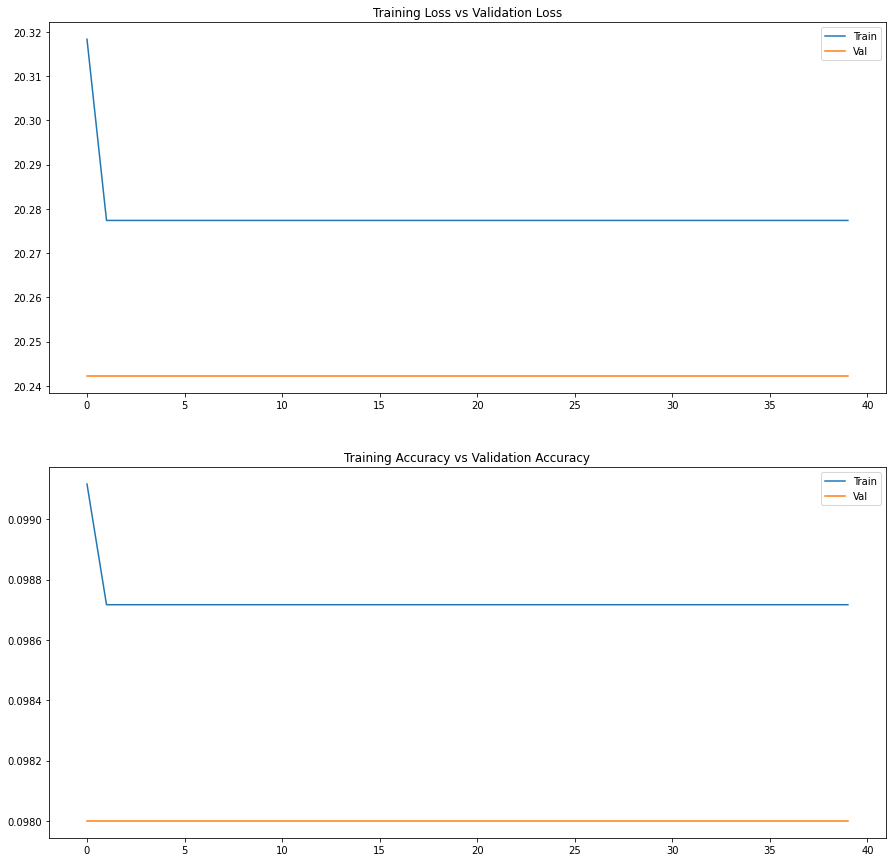

In [90]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

More tuning

In [91]:
model = models.Sequential()
model.add(layers.Conv2D(32,3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.MaxPooling2D(2,strides=(2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,input_shape=(3136,), activation=None))
model.add(layers.Dense(10, input_shape=(128,), activation=None))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [92]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 27s 28ms/step - loss: 2.6955 - accuracy: 0.3628 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 2/40
938/938 [==============================] - 27s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 3/40
938/938 [==============================] - 26s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 4/40
938/938 [==============================] - 27s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 5/40
938/938 [==============================] - 26s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 6/40
938/938 [==============================] - 26s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy: 0.4286
Epoch 7/40
938/938 [==============================] - 26s 28ms/step - loss: 2.3026 - accuracy: 0.4213 - val_loss: 2.3026 - val_accuracy:

In [93]:
model.evaluate(data_test_CNN, label_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.4286


[2.30259108543396, 0.428600013256073]

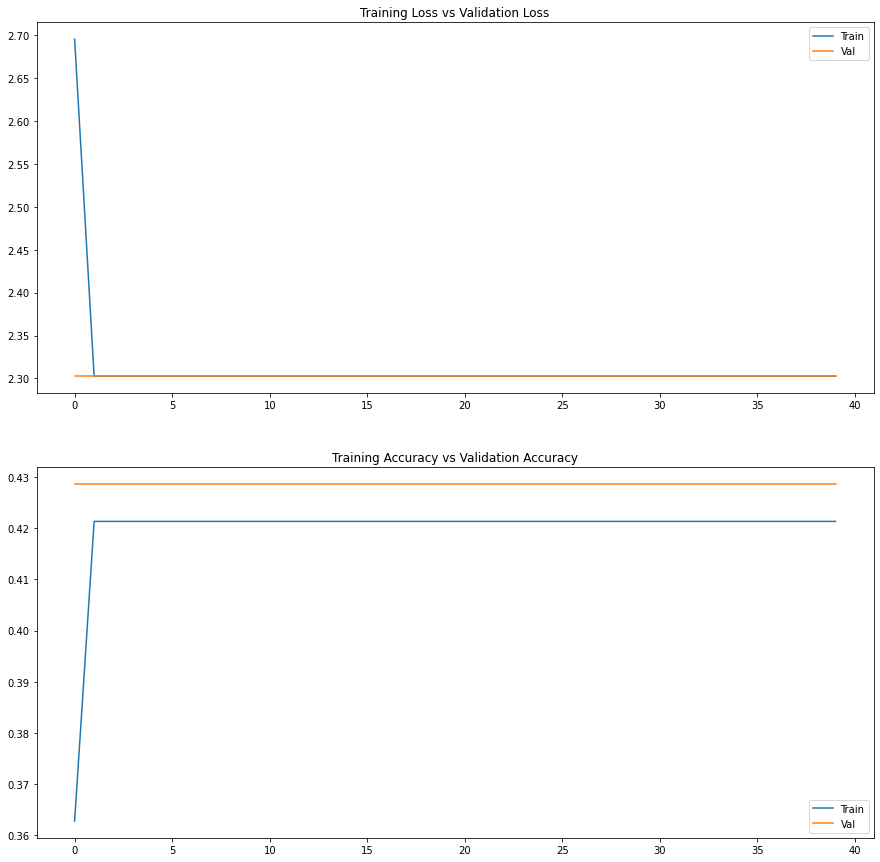

In [94]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [95]:
data_train_unpadded=(data_train/255)
data_test_unpadded=(data_test/255)

In [96]:
data_train_CNN_Le1 = tf.expand_dims(data_train_unpadded, axis=3, name=None)
data_test_CNN_Le1 = tf.expand_dims(data_test_unpadded, axis=3, name=None)

Testing LeNet 1

In [97]:
#Lenet 1
model = models.Sequential()
model.add(layers.Conv2D(4, 5, activation='tanh', input_shape=data_train_CNN_Le1.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(12, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_8 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 activation_8 (Activation)   (None, 12, 12, 4)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 12)          1212      
                                                                 
 average_pooling2d_9 (Averag  (None, 4, 4, 12)         0         
 ePooling2D)                                                     
                                                                 
 activation_9 (Activation)   (None, 4, 4, 12)         

In [98]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN_Le1, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN_Le1, label_test))

Epoch 1/40
938/938 [==============================] - 8s 8ms/step - loss: 1.6388 - accuracy: 0.5466 - val_loss: 0.8233 - val_accuracy: 0.8329
Epoch 2/40
938/938 [==============================] - 8s 9ms/step - loss: 0.6374 - accuracy: 0.8488 - val_loss: 0.4857 - val_accuracy: 0.8855
Epoch 3/40
938/938 [==============================] - 9s 10ms/step - loss: 0.4523 - accuracy: 0.8833 - val_loss: 0.3826 - val_accuracy: 0.9018
Epoch 4/40
938/938 [==============================] - 9s 10ms/step - loss: 0.3709 - accuracy: 0.9003 - val_loss: 0.3191 - val_accuracy: 0.9142
Epoch 5/40
938/938 [==============================] - 8s 9ms/step - loss: 0.3212 - accuracy: 0.9120 - val_loss: 0.2813 - val_accuracy: 0.9238
Epoch 6/40
938/938 [==============================] - 8s 9ms/step - loss: 0.2858 - accuracy: 0.9215 - val_loss: 0.2534 - val_accuracy: 0.9282
Epoch 7/40
938/938 [==============================] - 9s 9ms/step - loss: 0.2601 - accuracy: 0.9271 - val_loss: 0.2336 - val_accuracy: 0.9332
Epoc

In [99]:
model.evaluate(data_test_CNN_Le1, label_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9797


[0.06954093277454376, 0.9797000288963318]

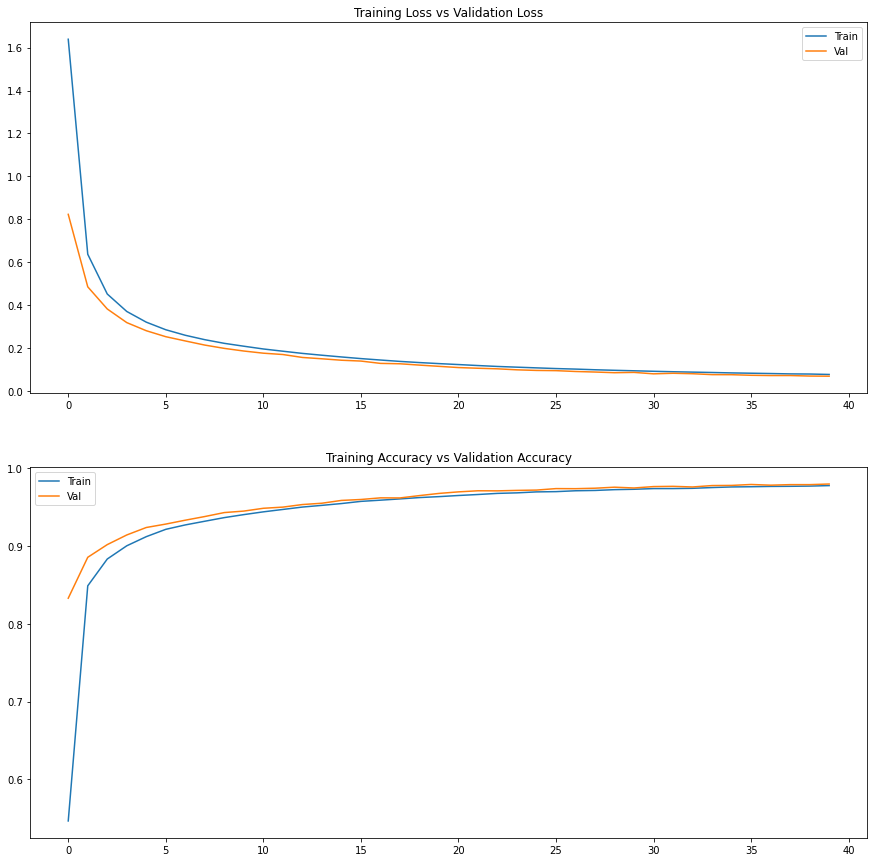

In [100]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

Dropout in architecture

In [101]:
# Lenet 5

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 activation_10 (Activation)  (None, 14, 14, 6)         0         
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_11 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 activation_11 (Activation)  (None, 5, 5, 16)         

In [102]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 14s 14ms/step - loss: 2.3317 - accuracy: 0.1037 - val_loss: 2.3199 - val_accuracy: 0.1009
Epoch 2/40
938/938 [==============================] - 13s 14ms/step - loss: 2.3161 - accuracy: 0.1051 - val_loss: 2.2911 - val_accuracy: 0.1135
Epoch 3/40
938/938 [==============================] - 12s 13ms/step - loss: 0.9910 - accuracy: 0.6665 - val_loss: 0.4572 - val_accuracy: 0.8465
Epoch 4/40
938/938 [==============================] - 13s 14ms/step - loss: 0.5215 - accuracy: 0.8288 - val_loss: 0.3731 - val_accuracy: 0.8807
Epoch 5/40
938/938 [==============================] - 13s 14ms/step - loss: 0.4581 - accuracy: 0.8503 - val_loss: 0.3309 - val_accuracy: 0.8922
Epoch 6/40
938/938 [==============================] - 13s 14ms/step - loss: 0.4239 - accuracy: 0.8601 - val_loss: 0.3231 - val_accuracy: 0.8934
Epoch 7/40
938/938 [==============================] - 13s 14ms/step - loss: 0.3884 - accuracy: 0.8731 - val_loss: 0.3123 - val_accuracy:

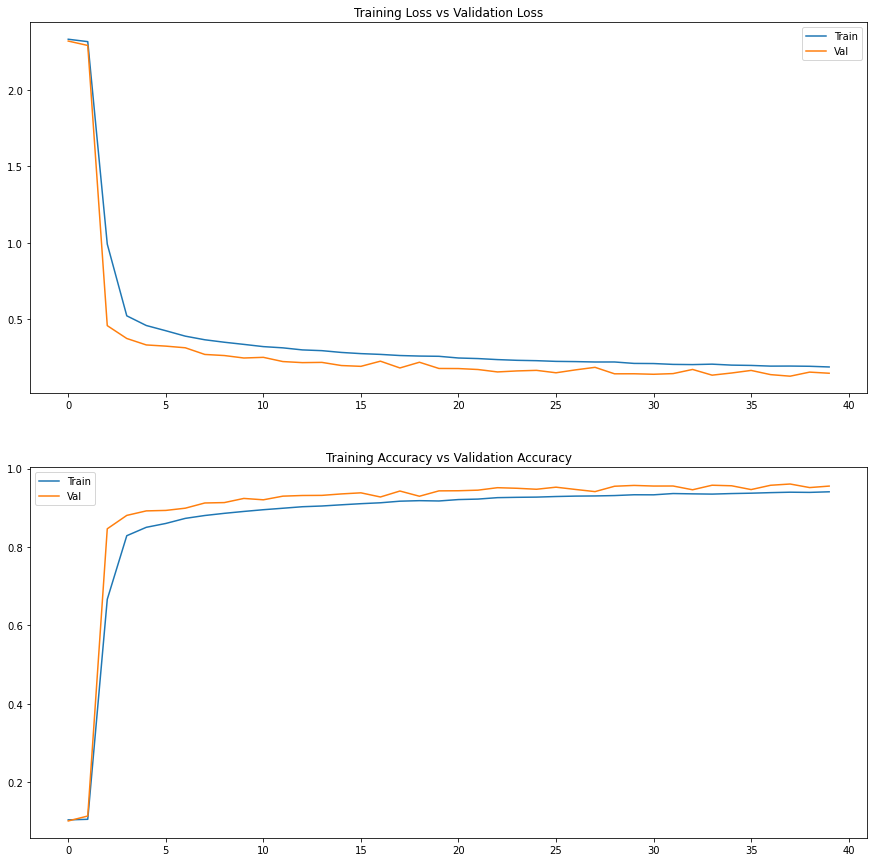

In [104]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

### Transfer Learning

#### Data Loading and Preprocessing

In [1]:
# Importing Dataset

TRAIN_DIR = 'Transfer_Learning_Dataset/training/training'
VAL_DIR = 'Transfer_Learning_Dataset/validation/validation'


In [111]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels_frame = pd.read_csv("Transfer_Learning_Dataset/monkey_labels.txt", names=cols, skiprows=1)
labels_frame

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


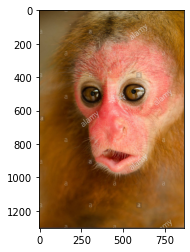

In [123]:
LABEL = 'n2'
IMAGE = 'n2017.jpg'
img = load_img(TRAIN_DIR+'/'+LABEL+'/'+IMAGE) # image loaded as PIL object
_ = plt.imshow(img)

In [112]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(120,120),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(VAL_DIR,target_size=(120,120),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


#### TASK 1

In [114]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [115]:
model =models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 117, 117, 32)      1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 55, 55, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 23328)             0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [120]:
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])
history=model.fit(train_generator,validation_data=test_generator,epochs=10)

Epoch 1/10
35/35 [==============================] - 33s 926ms/step - loss: 0.2811 - accuracy: 0.9481 - val_loss: 1.5771 - val_accuracy: 0.6176
Epoch 2/10
35/35 [==============================] - 31s 877ms/step - loss: 0.0159 - accuracy: 0.9982 - val_loss: 1.7219 - val_accuracy: 0.6324
Epoch 3/10
35/35 [==============================] - 31s 892ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.7192 - val_accuracy: 0.6544
Epoch 4/10
35/35 [==============================] - 31s 872ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.7946 - val_accuracy: 0.6397
Epoch 5/10
35/35 [==============================] - 31s 892ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8015 - val_accuracy: 0.6434
Epoch 6/10
35/35 [==============================] - 31s 904ms/step - loss: 7.7477e-04 - accuracy: 1.0000 - val_loss: 1.8263 - val_accuracy: 0.6434
Epoch 7/10
35/35 [==============================] - 31s 894ms/step - loss: 6.1831e-04 - accuracy: 1.0000 - val_loss: 1.8508 - val_accuracy

In [121]:
model.evaluate(test_generator)

9/9 [==============================] - 7s 679ms/step - loss: 1.8886 - accuracy: 0.6581


[1.888634443283081, 0.658088207244873]

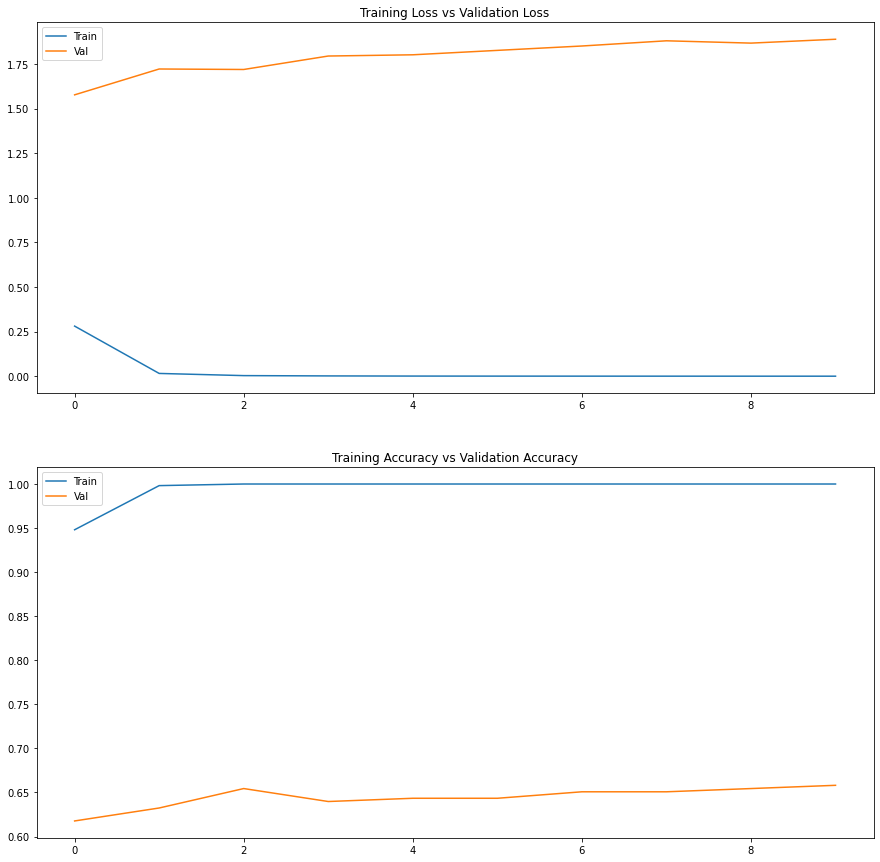

In [122]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

#### TASK 2

In [2]:
# If on MACOSX please refer to https://github.com/ageron/handson-ml/issues/46#issuecomment-311323613 to workaround any bug if occurs

from keras.applications import xception
model=xception.Xception(weights='imagenet',include_top=False,input_shape=(299,299,3))
model.trainable=False

2021-12-07 01:09:29.542123: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(VAL_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [6]:
from keras.models import Model
from keras.applications.xception import preprocess_input

In [7]:
generate_train_data = ImageDataGenerator(
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rescale = 1./255.,
    rotation_range = 20,
    )
data_gen_TL_train = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
data_gen_TL_test = generate_test_data.flow_from_directory(VAL_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


Extract Train Data into array

In [8]:
data_gen_TL_train.reset()
data_train_TL=np.concatenate([data_gen_TL_train.next()[0] for i in range(data_gen_TL_train.__len__())])
label_train_TL=np.concatenate([data_gen_TL_train.next()[1] for i in range(data_gen_TL_train.__len__())])

In [9]:
label_train_TL_finale=[None]*len(label_train_TL)
for i in range(len(label_train_TL)):
    label_train_TL_finale[i]=list(label_train_TL[i][:]).index(1)

Extract Test Data into array

In [10]:
data_gen_TL_test.reset()
data_test_TL=np.concatenate([data_gen_TL_test.next()[0] for i in range(data_gen_TL_test.__len__())])
label_test_TL=np.concatenate([data_gen_TL_test.next()[1] for i in range(data_gen_TL_test.__len__())])

In [11]:
print(data_test_TL.shape)
print(label_test_TL.shape)

(272, 299, 299, 3)
(272, 10)


In [12]:
label_test_TL_finale=[None]*len(label_test_TL)
for i in range(len(label_test_TL)):
    label_test_TL_finale[i]=list(label_test_TL[i][:]).index(1)

In [13]:
flat1 = layers.Flatten()(model.layers[-1].output)
class1 = layers.Dense(1024, activation='relu')(flat1)
output = layers.Dense(10, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

Xception (Takes Time)

In [15]:
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(data_gen_TL_train,epochs=10,validation_data=data_gen_TL_test)

Epoch 1/10
35/35 [==============================] - 138s 4s/step - loss: 6.8347 - accuracy: 0.8370 - val_loss: 1.8217 - val_accuracy: 0.9596
Epoch 2/10
35/35 [==============================] - 135s 4s/step - loss: 1.8914 - accuracy: 0.9526 - val_loss: 0.5902 - val_accuracy: 0.9816
Epoch 3/10
35/35 [==============================] - 138s 4s/step - loss: 1.2293 - accuracy: 0.9672 - val_loss: 0.9289 - val_accuracy: 0.9743
Epoch 4/10
35/35 [==============================] - 138s 4s/step - loss: 1.5815 - accuracy: 0.9663 - val_loss: 9.6466e-05 - val_accuracy: 1.0000
Epoch 5/10
35/35 [==============================] - 140s 4s/step - loss: 0.6669 - accuracy: 0.9736 - val_loss: 0.7741 - val_accuracy: 0.9779
Epoch 6/10
35/35 [==============================] - 155s 4s/step - loss: 0.8010 - accuracy: 0.9791 - val_loss: 1.3869 - val_accuracy: 0.9816
Epoch 7/10
35/35 [==============================] - 140s 4s/step - loss: 0.8441 - accuracy: 0.9772 - val_loss: 2.0489 - val_accuracy: 0.9449
Epoch 8/1

In [17]:
model.evaluate(data_gen_TL_test)

9/9 [==============================] - 23s 2s/step - loss: 0.2806 - accuracy: 0.9890


[0.2806427776813507, 0.9889705777168274]

Inception v3

In [26]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.preprocessing import image

In [27]:
training_path = os.path.join("Transfer_Learning_Dataset/training/training")
validation_path = os.path.join("Transfer_Learning_Dataset/validation/validation")
path = os.listdir(training_path)

In [28]:
training_generator = ImageDataGenerator(
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rescale = 1./255.,
    rotation_range = 20,
    )

In [29]:
train_data = training_generator.flow_from_directory(
    training_path, batch_size = 32, target_size=(150, 150), class_mode = "categorical", shuffle = True)

val_gen = ImageDataGenerator(
    rescale = 1./255.
)
val_data = val_gen.flow_from_directory(validation_path, batch_size = 1, target_size = (150,150),class_mode = "categorical", shuffle = True)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [30]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape = (150,150,3))
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_98 (BatchN  (None, 74, 74, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [31]:
model.trainable = False
add_model = models.Sequential()
add_model.add(model)
add_model.add(layers.GlobalAveragePooling2D())
add_model.add(layers.Dropout(0.5))
add_model.add(layers.Dense(10, 
                    activation='softmax'))

In [32]:
add_model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])
add_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [33]:
history = add_model.fit(train_data, 
                              epochs=10,validation_data=val_data)

Epoch 1/10
35/35 [==============================] - 44s 1s/step - loss: 3.1104 - accuracy: 0.3807 - val_loss: 0.7436 - val_accuracy: 0.7537
Epoch 2/10
35/35 [==============================] - 41s 1s/step - loss: 1.2112 - accuracy: 0.6867 - val_loss: 0.3833 - val_accuracy: 0.8860
Epoch 3/10
35/35 [==============================] - 38s 1s/step - loss: 0.7819 - accuracy: 0.7832 - val_loss: 0.3287 - val_accuracy: 0.9191
Epoch 4/10
35/35 [==============================] - 38s 1s/step - loss: 0.7022 - accuracy: 0.8060 - val_loss: 0.3519 - val_accuracy: 0.8824
Epoch 5/10
35/35 [==============================] - 38s 1s/step - loss: 0.6537 - accuracy: 0.8297 - val_loss: 0.2883 - val_accuracy: 0.9044
Epoch 6/10
35/35 [==============================] - 43s 1s/step - loss: 0.5694 - accuracy: 0.8525 - val_loss: 0.3226 - val_accuracy: 0.9191
Epoch 7/10
35/35 [==============================] - 39s 1s/step - loss: 0.5267 - accuracy: 0.8561 - val_loss: 0.2844 - val_accuracy: 0.9338
Epoch 8/10
35/35 [==

In [34]:
add_model.evaluate(val_data)

272/272 [==============================] - 10s 37ms/step - loss: 0.2459 - accuracy: 0.9191


[0.24593836069107056, 0.9191176295280457]